<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="45%" align="right" border="4">

# Stochastic Short Rates

This brief section illustrates the use of stochastic short rate models for simulation and (risk-neutral) discounting. The class used is called `stochastic_short_rate`.

## The Modelling 

First, the market environment. As a stochastic short rate model the `square_root_diffusion` class is (currently) available. We therefore need to define the respective parameters for this class in the market environment.

In [1]:
import warnings; warnings.simplefilter('ignore')

In [2]:
from dx import *

In [3]:
me = market_environment(name='me', pricing_date=dt.datetime(2015, 1, 1))
me.add_constant('initial_value', 0.01)
me.add_constant('volatility', 0.1)
me.add_constant('kappa', 2.0)
me.add_constant('theta', 0.05)
me.add_constant('paths', 1000)
me.add_constant('frequency', 'M')
me.add_constant('starting_date', me.pricing_date)
me.add_constant('final_date', dt.datetime(2015, 12, 31))
me.add_curve('discount_curve', 0.0)  # dummy
me.add_constant('currency', 0.0)  # dummy

Second, the instantiation of the class.

In [4]:
ssr = stochastic_short_rate('sr', me)

The following is an example `list` object containing `datetime` objects.

In [5]:
time_list = [dt.datetime(2015, 1, 1),
             dt.datetime(2015, 4, 1),
             dt.datetime(2015, 6, 15),
             dt.datetime(2015, 10, 21)]

The call of the method `get_forward_reates()` yields the above `time_list` object and the simulated forward rates. In this case, 10 simulations.

In [6]:
ssr.get_forward_rates(time_list, 10)

([datetime.datetime(2015, 1, 1, 0, 0),
  datetime.datetime(2015, 4, 1, 0, 0),
  datetime.datetime(2015, 6, 15, 0, 0),
  datetime.datetime(2015, 10, 21, 0, 0)],
 array([[ 0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
          0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ],
        [ 0.03277202,  0.02888579,  0.02597219,  0.03437966,  0.02609197,
          0.02668004,  0.03056627,  0.03347986,  0.02507239,  0.03336008],
        [ 0.04847622,  0.02778153,  0.02208502,  0.03542504,  0.03381398,
          0.02848213,  0.04861457,  0.05589349,  0.03990585,  0.04257658],
        [ 0.05166403,  0.04121302,  0.05144506,  0.06797319,  0.02824299,
          0.0419498 ,  0.05243283,  0.03619928,  0.02328994,  0.06677311]]))

Accordingly, the call of the `get_discount_factors()` method yields simulated zero-coupon bond prices for the time grid.

In [7]:
ssr.get_discount_factors(time_list, 10)

([datetime.datetime(2015, 1, 1, 0, 0),
  datetime.datetime(2015, 4, 1, 0, 0),
  datetime.datetime(2015, 6, 15, 0, 0),
  datetime.datetime(2015, 10, 21, 0, 0)],
 array([[ 0.96930155,  0.97754222,  0.97798078,  0.9696954 ,  0.97874354,
          0.97771286,  0.96961689,  0.96977567,  0.97816125,  0.96819563],
        [ 0.97442643,  0.98223994,  0.98232769,  0.97501559,  0.98310835,
          0.98214428,  0.97447841,  0.97498814,  0.98239997,  0.97338523],
        [ 0.98259442,  0.98797521,  0.98718981,  0.98203326,  0.98917777,
          0.98772624,  0.98243814,  0.9839819 ,  0.98898026,  0.981009  ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

## Stochstic Drifts

Let us value use the stochastic short rate model to simulate a geometric Brownian motion with stochastic short rate. Define the market environment as follows:

In [8]:
me.add_constant('initial_value', 36.)
me.add_constant('volatility', 0.2)
  # time horizon for the simulation
me.add_constant('currency', 'EUR')
me.add_constant('frequency', 'M')
  # monthly frequency; paramter accorind to pandas convention
me.add_constant('paths', 10)
  # number of paths for simulation

Then add the `stochastic_short_rate` object as discount curve.

In [9]:
me.add_curve('discount_curve', ssr)

Finally, instantiate the `geometric_brownian_motion` object.

In [10]:
gbm = geometric_brownian_motion('gbm', me)

We get simulated instrument values as usual via the `get_instrument_values()` method.

In [11]:
gbm.get_instrument_values()

array([[ 36.        ,  36.        ,  36.        ,  36.        ,
         36.        ,  36.        ,  36.        ,  36.        ,
         36.        ,  36.        ],
       [ 36.8060297 ,  35.75560124,  34.98778226,  37.24953986,
         35.01902026,  35.17279091,  36.20609756,  37.00065288,
         34.75400748,  36.96764721],
       [ 38.21614839,  34.16569133,  32.70350696,  36.40954077,
         34.65561565,  33.87070953,  37.88603564,  39.58040249,
         35.55090852,  37.35044144],
       [ 38.47450027,  33.88999526,  34.0982215 ,  39.27489627,
         32.69322908,  33.66728041,  38.22119959,  37.9877562 ,
         32.97984662,  39.62076877],
       [ 37.76574157,  33.70921262,  34.93754066,  41.4857547 ,
         33.30286899,  34.3470077 ,  38.48001428,  37.12512733,
         31.26650887,  38.95014155],
       [ 41.40824335,  32.65237919,  34.18828508,  39.57699414,
         36.64649108,  31.39011407,  39.80780981,  38.01482674,
         32.84186281,  35.46744615],
       [ 4

##  Visualization of Simulated Stochastic Short Rate

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

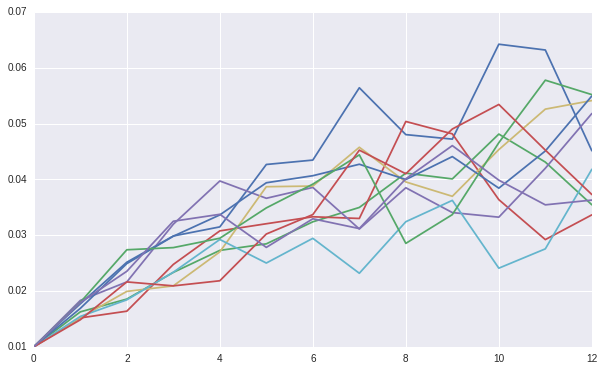

In [13]:
# short rate paths
plt.figure(figsize=(10, 6))
plt.plot(ssr.process.instrument_values[:, :10]);

**Copyright, License & Disclaimer**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

DX Analytics (the "dx library") is licensed under the GNU Affero General Public License
version 3 or later (see [http://www.gnu.org/licenses/](http://www.gnu.org/licenses/)).

DX Analytics comes with no representations
or warranties, to the extent permitted by applicable law.


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

[http://tpq.io](http://tpq.io) | [team@tpq.io](mailto:team@tpq.io) | [http://twitter.com/dyjh](http://twitter.com/dyjh)

**Quant Platform** |
[http://quant-platform.com](http://quant-platform.com)

**Derivatives Analytics with Python (Wiley Finance)** |
[http://derivatives-analytics-with-python.com](http://derivatives-analytics-with-python.com)

**Python for Finance (O'Reilly)** |
[http://python-for-finance.com](http://python-for-finance.com)